In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

In [ ]:
# Loading The File
fraud_raw_data = pd.read_csv('Fraud.csv')
fraud_raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Checking missing value
fraud_raw_data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
fraud_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
fraud_raw_data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
data = fraud_raw_data.copy()
data['type'] = data['type'].map({'PAYMENT':0,'TRANSFER':1,'CASH_OUT':2,'DEBIT':3,'CASH_IN':4})
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


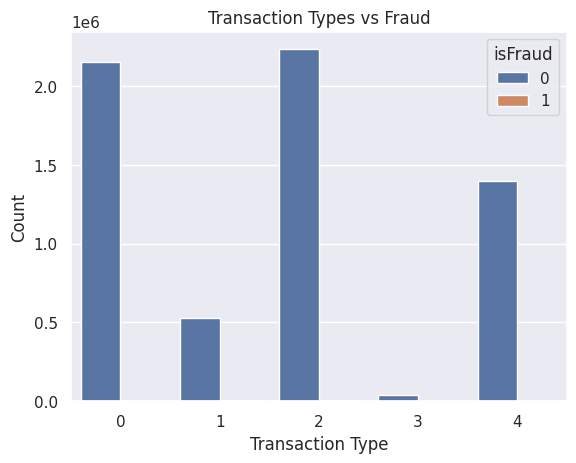

In [49]:
# Compare transaction types with fraud cases
sns.countplot(x='type', hue='isFraud', data=data)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Types vs Fraud')
plt.show()

In [ ]:
# Check the proportion of fraud cases in the dataset
fraud_percentage = data['isFraud'].mean() * 100
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")

In [ ]:
# Removing nameOrig and nameDest as nameOrig and nameDest may not be impactful for our analysis .
data = data.drop(['nameOrig','nameDest'],axis=1)
data.head()

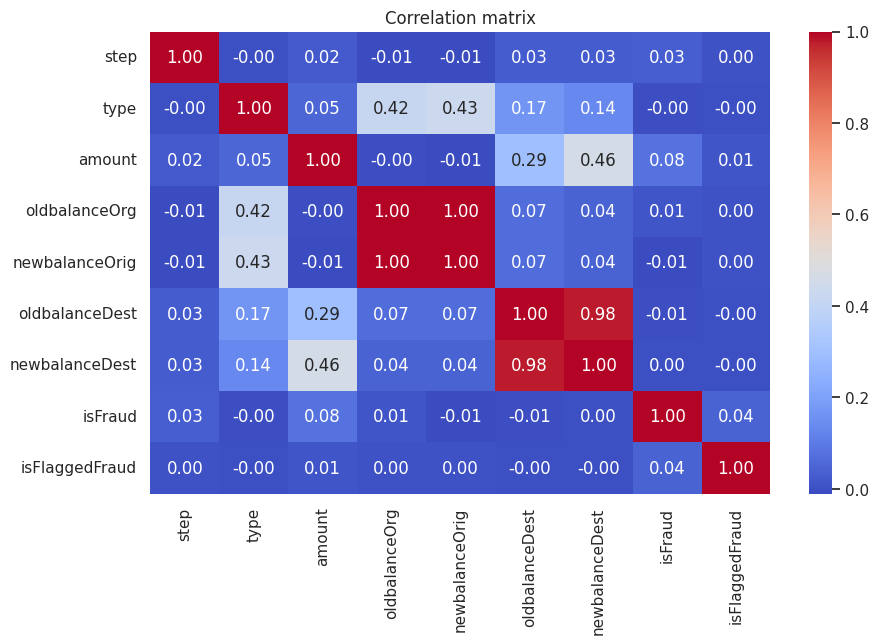

In [ ]:
# check correlation between features and isFraud
plt.figure(figsize=(10,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot= True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [ ]:
X = data.drop('isFraud',axis=1)
Y = data['isFraud']

In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
column_to_normalize = X.loc[:,['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
column_to_normalize

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,850002.52,850002.52,0.00,0.00,0.00


In [ ]:
column_names = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(column_to_normalize)
scaled_data

array([[0.00000000e+00, 1.06437179e-04, 2.85534757e-03, 3.23275647e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.01662565e-05, 3.56616357e-04, 3.90938877e-04,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.95790998e-06, 3.03767521e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.82716643e-02, 1.05922716e-01, 0.00000000e+00,
        1.92375796e-04, 1.79120417e-02],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        1.82859791e-02, 2.06640365e-02]])

In [ ]:
# Normalize tha varying datasets
X = pd.DataFrame(scaled_data, columns = column_names)
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000
...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000


In [ ]:
X['type'] = data['type']
X['isFlaggedFraud'] = data['isFlaggedFraud']
X.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFlaggedFraud
0,0.0,0.000106,0.002855,0.003233,0.0,0.0,0,0
1,0.0,0.000020,0.000357,0.000391,0.0,0.0,0,0
2,0.0,0.000002,0.000003,0.000000,0.0,0.0,1,0


In [ ]:
# To analyze which features are impactful for our model.
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,Y)
importance

array([1.08612836e-02, 2.44066756e-03, 2.60956267e-03, 6.52752403e-04,
       1.66191921e-04, 1.04227859e-04, 1.41059724e-01, 1.61911441e-05])

In [ ]:
summary = pd.DataFrame({'Feature':X.columns,'Importance':importance}).sort_values('Importance',ascending=False)
summary

,Feature,Importance
6,type,0.141060
0,step,0.010861
2,oldbalanceOrg,0.002610
1,amount,0.002441
3,newbalanceOrig,0.000653
4,oldbalanceDest,0.000166
5,newbalanceDest,0.000104
7,isFlaggedFraud,0.000016


In [ ]:
# oldbalanceDest, newbalanceDest', isFlaggedFraud have extremely low impact on our model . So it can be dropped.
processed_data = X.drop(['oldbalanceDest','newbalanceDest','isFlaggedFraud'],axis=1)
processed_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,type
0,0.0,0.000106,0.002855,0.003233,0
1,0.0,0.000020,0.000357,0.000391,0
2,0.0,0.000002,0.000003,0.000000,1
3,0.0,0.000002,0.000003,0.000000,2
4,0.0,0.000126,0.000697,0.000603,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separating dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(processed_data,Y,test_size=0.25,random_state=36)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4771965, 5), (1590655, 5), (4771965,), (1590655,))

In [ ]:
# Creating Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
model = rf.fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)

0.9999700333091295

In [ ]:
predict = model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test,predict)
accuracy

0.9996630318956656

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
c_matrix = confusion_matrix(y_test,predict)
c_matrix

array([[1588486,     126],
       [    410,    1633]])

In [ ]:
# Calculating prediction accuracy based on confusion matrix . It correctly shows how many actual fraud is true and how many actual fraud are predicted
# as false . This could be used to calculate accuracy and precision of model.
TN = c_matrix[0,0]
FP = c_matrix[0,1]
FN = c_matrix[1,0]
TP = c_matrix[1,1]
TN,FP,FN,TP

(1588486, 126, 410, 1633)

In [ ]:
C_matrix_accuracy = (TN+TP)/(TN+FP+FN+TP)
C_matrix_accuracy

0.9996630318956656

In [ ]:
# Precision for fraud
precision = TP/(TP+FP)
precision

0.9283683911313246

In [47]:
# Recall to check accuracy of fraud transactions out of all actual fraud transactions.
recall = TP/(TP+FN)
recall

0.7993147332354381

In [48]:
# Based on feature importance , confusion matrix accuracy , precision and recall , we have certain insight:
# Type of Transaction is crucial : real-time monitoring should be prioritized for certain transaction types (e.g., high-value transactions)
# Steps : Certain hour of day may higher fraudulent activity took place. Monitoring transaction during this time can be helpful
# Old and new balance : Their importance is low but sudden variation in new and old balance is dubious.